In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from testCases import *
from dnn_utils import *

# 设置一些图画的相关参数
%matplotlib inline

# 图像的大小
plt.rcParams["figure.figsize"] = (5.0, 4.0)
# 图像位置
plt.rcParams['image.interpolation'] = 'nearset'
# 图像颜色
plt.rcParams['image.cmap'] = 'gray'

# 设置随机函数
np.random.seed(1)



In [2]:
train_x_orig, train_y_orig, test_x_orig, test_y_orig,classes = load_data()
print('train_x_orig.shape',train_x_orig.shape)
print('train_y_orig.shape',train_y_orig.shape)
print('test_x_orig.shape',test_x_orig.shape)
print('test_y_orig.shape',test_y_orig.shape)
print('classes', classes)

train_x = train_x_orig.reshape(train_x_orig.shape[0],-1).T/255
train_y = train_y_orig

test_x = test_x_orig.reshape(test_x_orig.shape[0],-1).T/255
test_y = test_y_orig 


train_x_orig.shape (209, 64, 64, 3)
train_y_orig.shape (1, 209)
test_x_orig.shape (50, 64, 64, 3)
test_y_orig.shape (1, 50)
classes [b'non-cat' b'cat']


In [3]:
def initialize(dim_info): # 初始化函数 初始化W b的值

    np.random.seed(1)
    # dim_info 是一个列表里面包含了每一层的神经元的个数 比如说dim_info=[12288, 10, 7, 1]
    # 第一层的神经元个数是 10， 第二层神经元个数是：7 ，输出层的神经元个数是：1
    parameters = {} # 创建储存字典parameters
    
    dim_len = len(dim_info) # 得出有多少层神经网络
    
    # 开始有for循环来初始化参数 举例w[i,for i range(1,len(dim_info)),i-1]
    # 得出w1 = (? , 12288) 
    # 得出的b的维度是:b(?, 1)
    # 各个层的维度信息:
    # z = (w * x) + b
    # w * x = (?, temp_num)
    # b = (?, 1)
    # z = (?, temp_num)
    # a = sidmoid(z)
     
    # 用for循环来随机初始化w，b
    for l in range(1, dim_len):
        parameters['W'+ str(l)] = np.random.randn(dim_info[l], dim_info[l-1]) *np.sqrt(2/dim_info[l-1])
        # 防止梯度爆炸使w的值更小一些 除以前面神经元个数的开方
        parameters['b'+ str(l)] = np.zeros((dim_info[l],1))
        
    return parameters


In [4]:
dim_info = [12288, 30, 8, 6, 1]
parameters = initialize(dim_info)
print(parameters['W1'].shape)
print(parameters['b1'].shape)
print(parameters['W2'].shape)
print(parameters['b2'].shape)

(30, 12288)
(30, 1)
(8, 30)
(8, 1)


In [5]:
def line_forward(A, W, b):

    Z = np.dot(W, A)+b
    
    assert W.shape[1] == A.shape[0]
    
    assert b.shape == (W.shape[0],1)
    
    
    forward_Z_parameters = (A, W, b)
    
    
    return Z, forward_Z_parameters


In [6]:
# 前向传播激活函数层 选择激活函数
def line_activate(A_prev, W, b, activation):
    # 
    
    Z, forward_Z_parameters_cache = line_forward(A_prev, W, b) # 前向传播公式
    # forwars_Z_parameters_cache中包含了这一层的a,w,b 参数
    # cache 向前传播的返回的w,a_prev,b值
    
    if activation == 'sigmoid':
        A = sigmoid(Z) 
        
        # 激活函数这里不要被上面的a混淆了 这里的A是本层计算出来的激活值
        
    else: 
        activation == 'relu'
        A = relu(Z)
        
    forward_activate_parameters_Z = (forward_Z_parameters_cache, Z)
    
    
    # 储存本层所用到的计算参数 W，a-1，b,跟计算出来的逻辑回归值 z
    # 这些参数在反向传播中用得到
    # 反向传播时要用到的参数 z在激活函数的偏导数是要用到，
    # w 在计算z的偏导数时候要用到
    # a 在计算w的偏导数是要用到
    # b 在计算b的偏导数是要用到
    
    return A, forward_activate_parameters_Z, 


In [7]:
def line_model(X, parameters):
    # 构造成整一个的前向传播函数
    # parameters 这个参数包含了每一层的w， b 也就是每一层的w，b
    # print("parameters['w1']",parameters['w1'].shape)
    froward_model_cache = []
    
    A = X 
    
    layer_deep = len(parameters)//2
    # print('layer_deep',layer_deep)
    
    # 神经层数会等于是parameters除以二取整数 因为里面包含的是w，b参数
    
    for i in range(1,layer_deep):
        A_prev = A
        # 前面的layer_deep - 1 层用sigmoid激活函数
        
        A, forward_activate_parameters_Z = line_activate(A_prev, parameters['W'+str(i)], parameters['b'+str(i)], activation = 'rule')
        
        # 注意这个看得到的A是这一步算出来的A 值 而cache里面包含的A_prev是上一步的a
        
        # 这里在后面的反向传播中不要弄混了
        
        # 这个循环不包括最后一层的前向传播 这前面的前向传播激活函数是sigmod
        
        # 进行数据的储存也就是这一层所用到的参数 W,a-1,b,z 
        
        froward_model_cache.append(forward_activate_parameters_Z)
    
    # print('A_shape.shape',A.shape)
    
    # print('w4',parameters['w4'].shape)
    
    Al, forward_activate_parameters_Z = line_activate(A, parameters['W'+str(layer_deep)],parameters['b'+str(layer_deep)], activation = 'sigmoid')
    
    # 进行最后一层的向前传播
    
    froward_model_cache.append(forward_activate_parameters_Z) 
    
    # 储存上一步的w,a,b 这里的上一步是针对于最后一步来说的也就是用sigmoid激活函数那一层
    
    # cache 里面包含 w,b,a等参数 用于反向传播 前一步的w，b, a 最后的一步al才是最后面的sigmoid函数计算出来的值
    
    # print('ilne_model_Al.shape',Al.shape)
    
    return Al,  froward_model_cache
    
    
    
          

In [8]:
X, parameters = L_model_forward_test_case()
Al, caches = line_model(X, parameters)
print('Al'+str(Al))
print('Length of caches list='+str(len(caches)))


Al[[0.17007265 0.2524272 ]]
Length of caches list=2


In [9]:
def computer_cost(al, y):
    
    # 去样本值进行后面的求值计算

    m = y.shape[1]

    cost = (-1/m) * np.sum(np.multiply(y, np.log(al)) + np.multiply(1 - y,np.log(1-al))) 

    # cost = np.squeeze(cost) 
    # 对cost进行去维度化
    # print('computer_cost.shape', cost.shape)
    
    
    return cost

                           

<span class="burk"># cost加上正则</span>

In [10]:
def cost_L2_tail(cost, forward_parameters, lambda_num, m):
    
    parameters = {}
    
    arr = np.array(forward_parameters) # 将正向传播参数矩阵化
    
    L = arr.shape[0] # 提取网络层数
    
    for l in range(L):
        parameters["W"+str(l+1)] = arr[l][0][1] # 进行正向传播单个参数进行提取 
    
        parameters["b"+str(l+1)] = arr[l][0][2] # 与上面同理
    
    L2 = 0
    
    for L in range(L): # 对正向传播参数W进行平方计算
        L2 += np.sum(np.square(parameters["W"+str(L+1)]))
        
    L2_regulariztion_cost = lambda_num * L2 / (2 * m) + cost # cost加上L2正则运算

    return L2_regulariztion_cost, parameters
    

In [11]:
def back_forward(dz, forward_Z_parameters):
    
    
    a_prev, w, b = forward_Z_parameters 
    
    m = a_prev.shape[1]
    # 这一层样本数 
    
    # dz 最后一层的损失dz梯度
    # cache 前向传播时保存下来的参数值 分别是a,w,b
    
    # dz.shape(1, 209)
    # a.shape(12288, 209)
    # 这个a在输入层的话就是x所以他的维度信息就可以得出来就是 (12288, 209)
    # 在反向传播中进行倒置 与dz相乘得到dw.shape(1, 12288)
    
    dW = np.dot(dz, forward_Z_parameters[0].T)/m 
    # dz = (1,209),a_prev.shape(1,1)
    # dw.shape(1, 209)
    
    db = np.sum(dz, axis = 1, keepdims=True)/m 
    # 以列为轴将每一行的数据进行相加
    
    dA = np.dot(forward_Z_parameters[1].T, dz)
    # da (a的偏导数等于w*dz)
    # w.shape(1, 209)
    # dz.shape(1, 209)
    # da.shape(1,1)
    
    return dA, dW, db

    


In [12]:
def line_activation_backward(dA, forward_model_cache, activation):
    """
    da 这一层的da也就是最后一层da值
    cache = 向前传播时这一层的相关变量
    activation  指示该层使用什么激活函数 "sigmoid"或者是"relu"
    
    """
    linear_caches, activation_cache = forward_model_cache
    # da,dw,db,Z
    if activation == 'relu':
        dz = relu_backward(dA, activation_cache)
        # 上一步的dz等于这一步的dz乘以上一步的da
        # 这一层的dz会等于al的偏导数乘以a的偏导数
    elif activation =='sigmoid': 
#         sigmoid偏导数等于a(1-a)
#         tanh偏导数等于1-a*a
        dz = sigmoid_backward(dA, activation_cache)
    
    # 根据这一层的dz算出这一层的dw，db以及前一层的da
    da_prev, dw, db = back_forward(dz, linear_caches)
    
    return da_prev, dw, db
        

In [13]:
# 下面构建出整个反向传播公式
def line_model_backward(Al, y, forward_model_cache):
    # al 最后一层的al值也就是预测值 cache是每一层储存相关参数
    
    # print("line_model_backward-foward_model_cache", forward_model_cache)
    
    grades = {}
    
    l = len(forward_model_cache)
    
    m = y.shape[1]
    # print('line_model_backward_m',m)
    
    y = y.reshape(Al.shape) # 使真实标签与预测值标签的维度保持一样方便后面的dal计算
        
    dal = -(np.divide(y,Al) - np.divide(1-y, 1-Al))
    
    # 计算最后一层的dw, db 因为最后一层使用的是sigmoid，可以直接算出dw跟db的值
    
    last_layer_parameters = forward_model_cache[-1]
    
    grades['dA'+str(l-1)], grades['dW'+str(l)], grades['db'+str(l)] = line_activation_backward(dal, last_layer_parameters, activation='sigmoid')
    
    # grades['dW'+str(l)] = grades["dW"+str(l)] +
    
    # 这个revered函数会将循环的数进行倒置
    
    for i in reversed(range(1,l)):
        grades['dA'+str(i - 1)], grades['dW'+str(i)],grades['db'+str(i)] = line_activation_backward(grades["dA"+str(i)],
                                                                                               forward_model_cache[i-1],
                                                                                              activation = 'relu')
        
        # 这个for循环不会包含l的值所以这里计算的偏导数也就不包含最后一步的偏导数
    return grades
                                     
    
    

<span class="burk">正则化的反向传播公式</span>

In [14]:
def backer_forward_L2(Al, y, forward_model_cache, forward_parameters, lambda_num = 0.7):
    
    grades = {}
    
    l = len(forward_model_cache)
    
    m = y.shape[1]
    # print('line_model_backward_m',m)
    
    y = y.reshape(Al.shape) # 使真实标签与预测值标签的维度保持一样方便后面的dal计算
        
    dal = -(np.divide(y,Al) - np.divide(1-y, 1-Al))
    
    # 计算最后一层的dw, db 因为最后一层使用的是sigmoid，可以直接算出dw跟db的值
    
    last_layer_parameters = forward_model_cache[-1]
    
    grades['dA'+str(l-1)], grades['dW'+str(l)], grades['db'+str(l)] = line_activation_backward(dal, last_layer_parameters, activation='sigmoid')
    
    grades['dW'+str(l)] = grades["dW"+str(l)] + lambda_num * forward_parameters["W"+str(l)] / m
    # 这个revered函数会将循环的数进行倒置
    
    for i in reversed(range(1,l)):
        grades['dA'+str(i - 1)], grades['dW'+str(i)],grades['db'+str(i)] = line_activation_backward(grades["dA"+str(i)],
                                                                                               forward_model_cache[i-1],
                                                                                             activation = 'relu')
        
        
        grades["dW"+str(i - 1)] = grades['dW'+str(i)] + lambda_num * forward_parameters['W'+str(i)] / m
        
        # 这个for循环不会包含l的值所以这里计算的偏导数也就不包含最后一步的偏导数
    return grades
                                     
    
    

In [15]:
Al, Y_assess, caches = L_model_backward_test_case()
grads = line_model_backward(Al, Y_assess, caches)
print('dW1',grads['dW1'])
print('db1',grads['db1'])
print('dA1',grads['dA1'])


dW1 [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]]


In [16]:
def updata_parameters(parameters, grads, learning_rate):
    
    L = len(parameters)//2
    
    for i in range(1,L+1):
        parameters['W'+str(i)] = parameters['W' + str(i)] - grads['dW'+str(i)]*learning_rate
        
        parameters['b'+str(i)] = parameters['b' + str(i)] - grads['db'+str(i)]*learning_rate
        
    return parameters


In [17]:
def dnn_model(x, y, dim_info, learning_rate=0.0075, num_iterations=100, print_cost= True, lambda_num=0 ):
    
    np.random.seed(1)
    costs = []
    m = y.shape[1]
    
    parameters = initialize(dim_info)
    
    for i in range(0,num_iterations):
        Al, forward_model_cache = line_model(x, parameters) # 向前传播的函数 // 这个向前传播函数放进cost函数当中 所以这一个函数在这里没用调用
        
        cost = computer_cost(Al, y) # 进行成本计算 # 因为后面把line_model函数放进了computer_cost函数当中所以computer_cost函数增加了两个参数值 (x，parametes)
        # //~~ 去除Al参数因为在内部已经调用
        
        cost_L2, parameters_cost_L2 = cost_L2_tail(cost, forward_model_cache, lambda_num, m) # L2 的正向传播函数
        
        # grades = line_model_backward(Al, y, forward_model_cache) # 进行反向传播
        
        grades = backer_forward_L2(Al, y, forward_model_cache, parameters_cost_L2, lambda_num ) # 加正则化之后的反向传播公式
        
        parameters = updata_parameters(parameters, grades, learning_rate)
        
        
        # if i % 100 == 0:
            # if print_cost and i > 0:
                # print('训练%i次后的成本是: %f'%(i, cost))
            # costs.append(cost)
            
        if i % 100 ==0:
            if print_cost and i > 0:
                print("训练%i次后的成本是: %f"%(i, cost_L2))
            costs.append(cost_L2)
    
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations(per tens)')
    plt.title('Learning rate ='+str(learning_rate))

    plt.show()
        
    return parameters
    
        
        

/Users/sandy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """


训练100次后的成本是: 1.086615
训练200次后的成本是: 1.018343
训练300次后的成本是: 0.948026
训练400次后的成本是: 0.870058
训练500次后的成本是: 0.827412
训练600次后的成本是: 0.770008
训练700次后的成本是: 0.734844
训练800次后的成本是: 0.702187
训练900次后的成本是: 0.700292
训练1000次后的成本是: 0.663659
训练1100次后的成本是: 0.646769
训练1200次后的成本是: 0.633778
训练1300次后的成本是: 0.623236
训练1400次后的成本是: 0.614396
训练1500次后的成本是: 0.606683
训练1600次后的成本是: 0.599542
训练1700次后的成本是: 0.600706
训练1800次后的成本是: 0.588388
训练1900次后的成本是: 0.583287
训练2000次后的成本是: 0.577305
训练2100次后的成本是: 0.572726
训练2200次后的成本是: 0.567231
训练2300次后的成本是: 0.563922
训练2400次后的成本是: 0.560817
训练2500次后的成本是: 0.557738
训练2600次后的成本是: 0.555588
训练2700次后的成本是: 0.553116
训练2800次后的成本是: 0.551158
训练2900次后的成本是: 0.548861


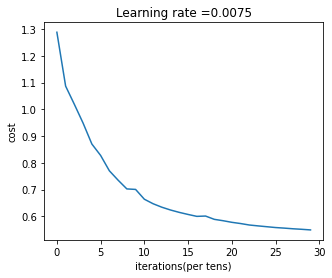

In [18]:
dim_info = [12288, 30, 8, 6, 1]
#dim_info = [12288, 100, 20, 10, 1]


parameters = dnn_model(train_x, train_y, dim_info, learning_rate=0.0075, num_iterations = 3000, print_cost = True, lambda_num = 2)


In [19]:
def predict(X,parameters):   
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # 进行一次前向传播，得到预测结果
    probas, caches = line_model(X, parameters)
   
    # 将预测结果转化成0和1的形式，即大于0.5的就是1，否则就是0
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
        
    return p

In [20]:
pred_train = predict(train_x, parameters)

print('预测准确率是:'+ str(np.sum((pred_train == train_y) / train_x.shape[1])))

预测准确率是:0.9952153110047844


In [21]:
pred_test = predict(test_x, parameters)
print("测试集的准确率是:"+str(np.sum((pred_test == test_y) / test_x.shape[1])))


测试集的准确率是:0.8200000000000001


In [22]:
# 遇到的问题如下 神经网络的架构问题
# 变量问题导致的变量冲突
# 激活函数用错问题 在隐藏层用了sigmod激活函数，在输出层用了relu激活函数
# 算法逻辑